In [2]:
import pandas as pd
import numpy as np
from multiprocessing import Pool as ThreadPool
from tqdm import tqdm
import dask.config
import xarray as xr
import xbatcher as xb
import numpy as np
import dask
import torch
import random
import os

from data.era5 import gen_bgen
from metrics.metrics import WeightedRMSE
from models.autoencoder import Autoencoder

NUM_WORKERS = 6

In [3]:
bgen = gen_bgen(train=True)

batch = bgen[0]

stacked = batch.to_stacked_array(
    new_dim="channel", sample_dims=["latitude", "longitude"]
).transpose("channel", "longitude", "latitude")

item = torch.tensor(stacked.data)
item = item.unsqueeze(0)
item = item[:, :, :, :-1]

In [20]:
item[0, 68].min()

tensor(3.8429e-05)

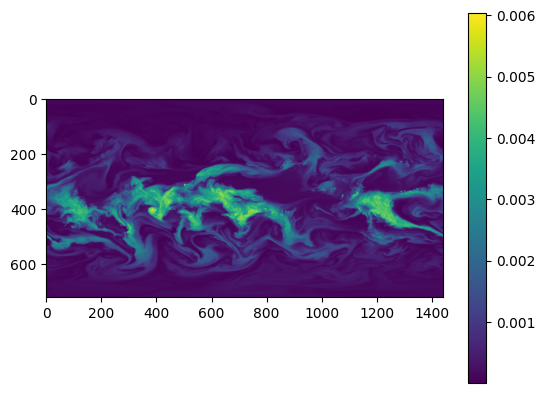

In [30]:
from matplotlib import pyplot as plt

plt.imshow(item[0, 63].numpy().T)
plt.colorbar()
plt.show()

2.984878847200889e-06
2.3116672309697606e-06
3.846713298116811e-06
1.2933137440995779e-05
4.0663064282853156e-05
9.401507122674957e-05
0.00029911354067735374
0.0006731094908900559
0.0012438781559467316
0.0020471755415201187
0.004047004040330648
0.005430919583886862
0.006311459932476282


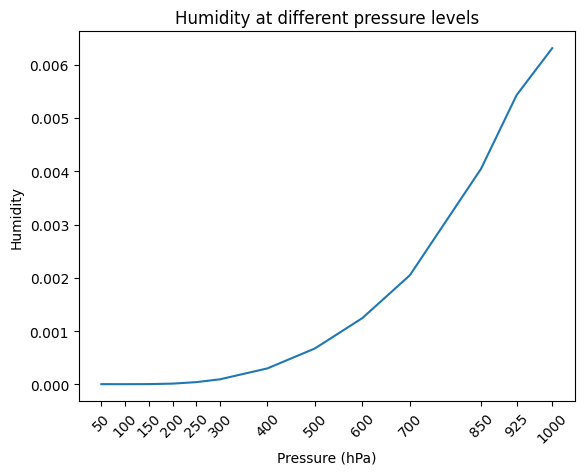

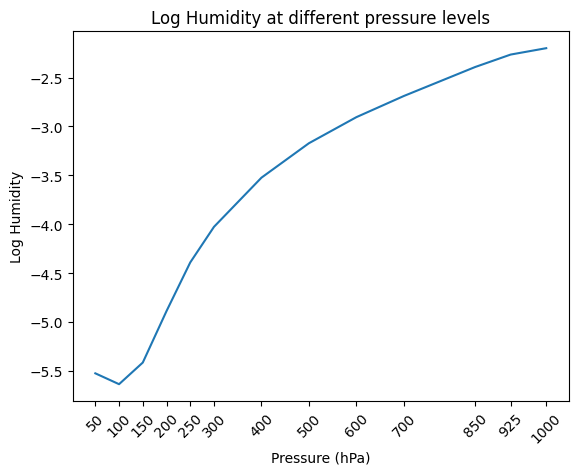

In [40]:
humidity = []

for i in range(13):
    print(item[0, 56 + i].mean().item())
    humidity.append(item[0, 56 + i].mean().item())

x = np.array([50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000])

plt.plot(x, humidity)
plt.xlabel("Pressure (hPa)")
plt.ylabel("Humidity")
plt.title("Humidity at different pressure levels")
plt.xticks(x, rotation=45)
plt.show()

plt.plot(x, np.log10(np.array(humidity)))
plt.xlabel("Pressure (hPa)")
plt.ylabel("Log Humidity")
plt.title("Log Humidity at different pressure levels")
plt.xticks(x, rotation=45)
plt.show()


215.02200317382812
210.0129852294922
213.99209594726562
217.50494384765625
221.36160278320312
226.62026977539062
239.51715087890625
250.5349578857422
258.988525390625
265.5969543457031
272.8215637207031
275.49334716796875
278.7034606933594


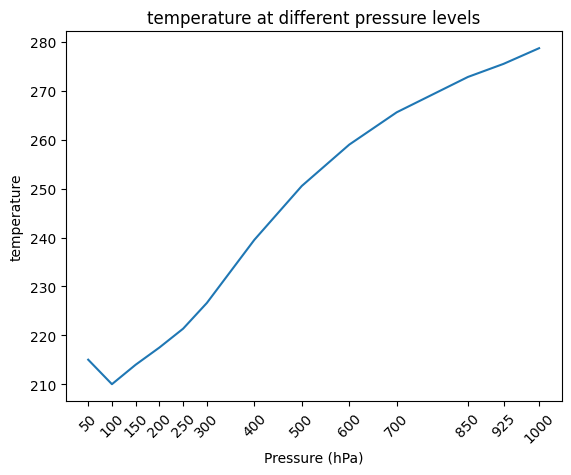

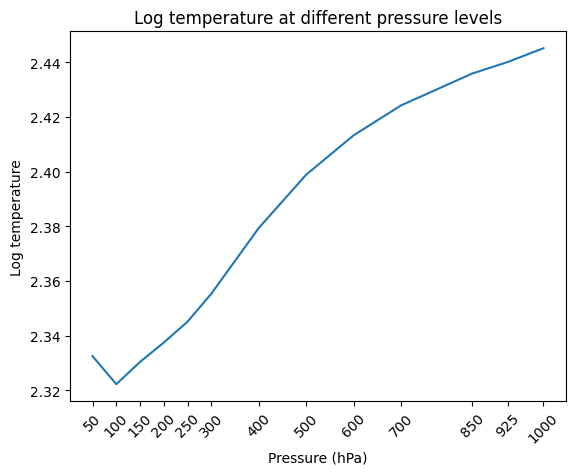

In [41]:
temp = []

for i in range(13):
    print(item[0, 4 + i].mean().item())
    temp.append(item[0, 4 + i].mean().item())

x = np.array([50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000])

plt.plot(x, temp)
plt.xlabel("Pressure (hPa)")
plt.ylabel("temperature")
plt.title("temperature at different pressure levels")
plt.xticks(x, rotation=45)
plt.show()

plt.plot(x, np.log10(np.array(temp)))
plt.xlabel("Pressure (hPa)")
plt.ylabel("Log temperature")
plt.title("Log temperature at different pressure levels")
plt.xticks(x, rotation=45)
plt.show()